In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from keras.utils import to_categorical, plot_model
from keras.models import Sequential
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
import tensorflow as tf
from tensorflow import keras

In [4]:
print(len(tf.config.experimental.list_physical_devices('GPU')))

1


In [5]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.test.is_built_with_cuda()

True

In [7]:
print(tf.version.VERSION)

2.9.1


In [8]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices()) # list of DeviceAttributes

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9997626225793133859
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6118686720
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13108485455982323876
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 2060 SUPER, pci bus id: 0000:29:00.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [9]:
import sys

sys.version

'3.9.13 (tags/v3.9.13:6de2ca5, May 17 2022, 16:36:42) [MSC v.1929 64 bit (AMD64)]'

In [10]:
epochs = 100
lr = 1e-3
batch_size = 64
img_dims = (96,96,3)

data = []
labels = []

# load image files from the dataset
image_files = [f for f in glob.glob(r'gender_dataset_face' + "/**/*", recursive=True) if not os.path.isdir(f)]
random.shuffle(image_files)

# converting images to arrays and labelling the categories
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (img_dims[0],img_dims[1]))
    image = img_to_array(image)
    data.append(image)

    label = img.split(os.path.sep)[-2] # C:\Files\gender_dataset_face\woman\face_1162.jpg
    if label == "woman":
        label = 1
    else:
        label = 0
        
    labels.append([label]) # [[1], [0], [0], ...]

# pre-processing
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

# split dataset for training and validation
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2,
                                                  random_state=42)

trainY = to_categorical(trainY, num_classes=2) # [[1, 0], [0, 1], [0, 1], ...]
testY = to_categorical(testY, num_classes=2)

# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

# define model
def build(width, height, depth, classes):
    model = Sequential()
    inputShape = (height, width, depth)
    chanDim = -1

    if K.image_data_format() == "channels_first": #Returns a string, either 'channels_first' or 'channels_last'
        inputShape = (depth, height, width)
        chanDim = 1
    
    # The axis that should be normalized, after a Conv2D layer with data_format="channels_first", 
    # set axis=1 in BatchNormalization.

    model.add(Conv2D(32, (3,3), padding="same", input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization(axis=chanDim))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(classes))
    model.add(Activation("sigmoid"))

    return model

C:\Users\dogan\AppData\Roaming\Python\Python39\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\dogan\AppData\Local\Temp\ipykernel_12432\1820511841.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),


Epoch 1/100
28/28 [==============================] - 10s 145ms/step - loss: 0.7562 - accuracy: 0.7266 - val_loss: 0.7298 - val_accuracy: 0.5065
Epoch 2/100
28/28 [==============================] - 3s 122ms/step - loss: 0.4386 - accuracy: 0.8198 - val_loss: 0.7298 - val_accuracy: 0.4935
Epoch 3/100
28/28 [==============================] - 3s 122ms/step - loss: 0.3867 - accuracy: 0.8512 - val_loss: 0.6936 - val_accuracy: 0.5325
Epoch 4/100
28/28 [==============================] - 3s 123ms/step - loss: 0.3485 - accuracy: 0.8535 - val_loss: 0.7831 - val_accuracy: 0.7121
Epoch 5/100
28/28 [==============================] - 4s 124ms/step - loss: 0.3365 - accuracy: 0.8731 - val_loss: 0.8377 - val_accuracy: 0.5303
Epoch 6/100
28/28 [==============================] - 4s 125ms/step - loss: 0.2896 - accuracy: 0.8843 - val_loss: 0.9359 - val_accuracy: 0.4935
Epoch 7/100
28/28 [==============================] - 4s 124ms/step - loss: 0.2668 - accuracy: 0.8961 - val_loss: 1.1196 - val_accuracy: 0.493

Epoch 58/100
28/28 [==============================] - 3s 123ms/step - loss: 0.0534 - accuracy: 0.9798 - val_loss: 0.5264 - val_accuracy: 0.8658
Epoch 59/100
28/28 [==============================] - 3s 122ms/step - loss: 0.0534 - accuracy: 0.9820 - val_loss: 0.0609 - val_accuracy: 0.9719
Epoch 60/100
28/28 [==============================] - 3s 123ms/step - loss: 0.0395 - accuracy: 0.9899 - val_loss: 0.5272 - val_accuracy: 0.8615
Epoch 61/100
28/28 [==============================] - 4s 124ms/step - loss: 0.0641 - accuracy: 0.9770 - val_loss: 0.1220 - val_accuracy: 0.9654
Epoch 62/100
28/28 [==============================] - 3s 123ms/step - loss: 0.0633 - accuracy: 0.9770 - val_loss: 0.1944 - val_accuracy: 0.9416
Epoch 63/100
28/28 [==============================] - 3s 122ms/step - loss: 0.0468 - accuracy: 0.9809 - val_loss: 0.8001 - val_accuracy: 0.7944
Epoch 64/100
28/28 [==============================] - 3s 122ms/step - loss: 0.0299 - accuracy: 0.9888 - val_loss: 0.5309 - val_accuracy:

INFO:tensorflow:Assets written to: gender_detection.model\assets


INFO:tensorflow:Assets written to: gender_detection.model\assets


KeyError: 'val_acc'

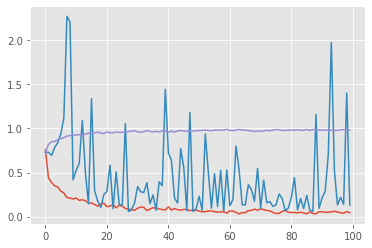

In [11]:
# build model
model = build(width=img_dims[0], height=img_dims[1], depth=img_dims[2],
                            classes=2)

# compile the model
opt = Adam(lr=lr, decay=lr/epochs)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# train the model
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size),
                        validation_data=(testX,testY),
                        steps_per_epoch=len(trainX) // batch_size,
                        epochs=epochs, verbose=1)

# save the model to disk
model.save('gender_detection.model')

# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_acc"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')

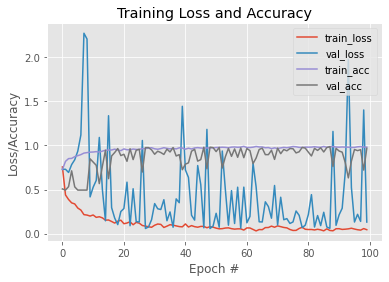

In [12]:
# plot training/validation loss/accuracy
plt.style.use("ggplot")
plt.figure()
N = epochs
plt.plot(np.arange(0,N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0,N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0,N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0,N), H.history["val_accuracy"], label="val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right")

# save plot to disk
plt.savefig('plot.png')